# Glass Identification

##### Project Description

The dataset describes the chemical properties of glass and involves classifying samples of glass using their chemical properties as one of six classes. The dataset was credited to Vina Spiehler in 1987. The study of classification of types of glass was motivated by criminological investigation. At the scene of the crime, the glass left can be used as evidence...if it is correctly identified!


The chemical compositions are measured as the weight percent in corresponding oxide.

##### Attribute Information-
1.	 Id number: 1 to 214
2.	 RI: refractive index
3.	Na: Sodium (unit measurement: weight percent in corresponding oxide, as are attributes 4-10)
4.	Mg: Magnesium
5.	Al: Aluminum
6.	Si: Silicon
7.	K: Potassium
8.	Ca: Calcium
9.	Ba: Barium
10.	Fe: Iron
11.	Type of glass: (class attribute)

•	1- building_windows_float_processed

•	2- building_windows_non_float_processed

•	3- vehicle_windows_float_processed

•	4- vehicle_windows_non_float_processed (none in this database)

•	5- containers

•	6- tableware

•	7- headlamps

There are 214 observations in the dataset. The dataset can be divided into window glass (classes 1-4) and non-window glass (classes 5-7). 
Predict : Type of glass

##### Dataset Link-

•	https://raw.githubusercontent.com/dsrscientist/dataset3/main/glass.csv
•	https://github.com/dsrscientist/dataset3


In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

In [2]:
col_name = ['Id','RI','Na','Mg','Al','Si','K','Ca','Ba','Fe','Type']

In [3]:
# loading the dataset 
dataset = pd.read_csv("glass.csv",names = col_name)
print(dataset.shape)
dataset.head(10)


(214, 11)


,Id,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.00,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.00,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.00,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.00,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.00,1
5,6,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.0,0.26,1
6,7,1.51743,13.30,3.60,1.14,73.09,0.58,8.17,0.0,0.00,1
7,8,1.51756,13.15,3.61,1.05,73.24,0.57,8.24,0.0,0.00,1
8,9,1.51918,14.04,3.58,1.37,72.08,0.56,8.30,0.0,0.00,1
9,10,1.51755,13.00,3.60,1.36,72.99,0.57,8.40,0.0,0.11,1


In [4]:
# Let's cjeck the duplicate values
dataset.duplicated().sum()

0

In [5]:
#Checking the null values
dataset.isnull().sum()

Id      0
RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

<AxesSubplot:>

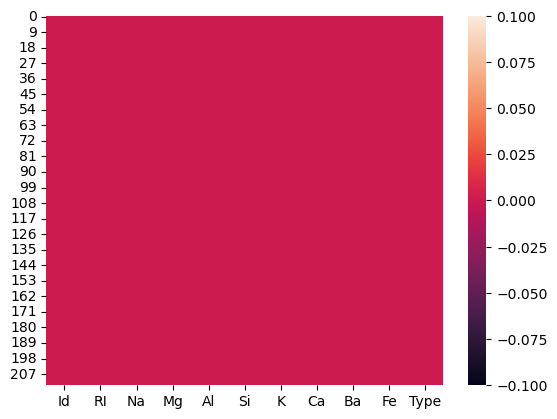

In [6]:
# Heatmap for null values
sns.heatmap(dataset.isnull())

In this dataset we don't have any duplicate values and nulll values.

In [7]:
dataset.head()

,Id,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [8]:
dataset.tail(10)

,Id,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
204,205,1.51617,14.95,0.0,2.27,73.30,0.00,8.71,0.67,0.0,7
205,206,1.51732,14.95,0.0,1.80,72.99,0.00,8.61,1.55,0.0,7
206,207,1.51645,14.94,0.0,1.87,73.11,0.00,8.67,1.38,0.0,7
207,208,1.51831,14.39,0.0,1.82,72.86,1.41,6.47,2.88,0.0,7
208,209,1.51640,14.37,0.0,2.74,72.85,0.00,9.45,0.54,0.0,7
209,210,1.51623,14.14,0.0,2.88,72.61,0.08,9.18,1.06,0.0,7
210,211,1.51685,14.92,0.0,1.99,73.06,0.00,8.40,1.59,0.0,7
211,212,1.52065,14.36,0.0,2.02,73.42,0.00,8.44,1.64,0.0,7
212,213,1.51651,14.38,0.0,1.94,73.61,0.00,8.48,1.57,0.0,7
213,214,1.51711,14.23,0.0,2.08,73.36,0.00,8.62,1.67,0.0,7


In [9]:
dataset.columns

Index(['Id', 'RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type'], dtype='object')

since the Id columns is not required for Glass identification.

In [10]:
data = dataset.copy()
data.drop("Id", axis = 1, inplace = True)

In [11]:
data.shape

(214, 10)

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


All the input data in in same data type and the output is in integer

In [13]:
data["Type"].unique()

array([1, 2, 3, 5, 6, 7], dtype=int64)

Here we have total 6 types of the Glass in target Variable

In [14]:
data['Type'].value_counts()

2    76
1    70
7    29
3    17
5    13
6     9
Name: Type, dtype: int64

### EDA

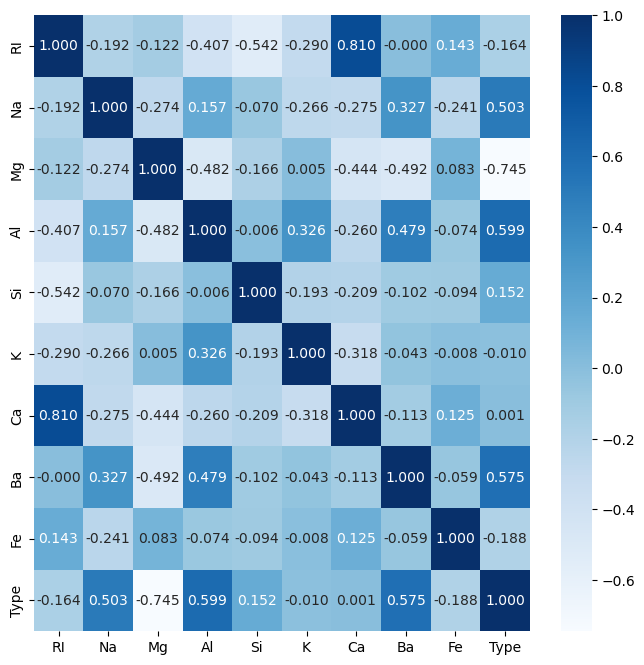

In [15]:
#Checking the correlation
plt.figure(figsize = (8,8))
sns.heatmap(data.corr(),cmap = "Blues" , annot = True, fmt='.3f')
plt.show()

In [16]:
input_data = data.columns[0:-1]
input_data

Index(['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe'], dtype='object')

In [17]:
# Univariate analysis with Distributation plot

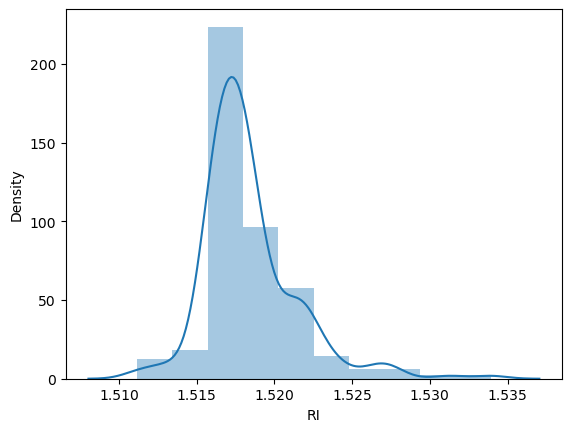

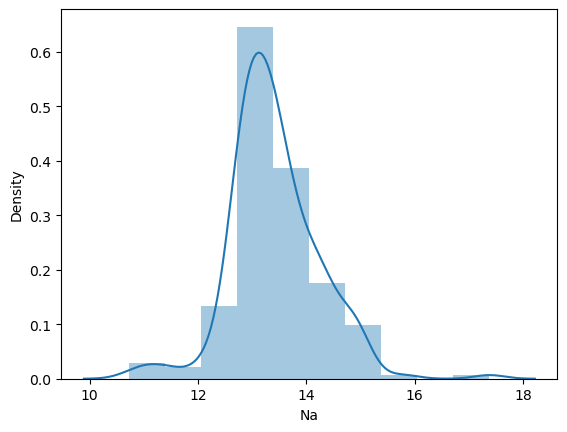

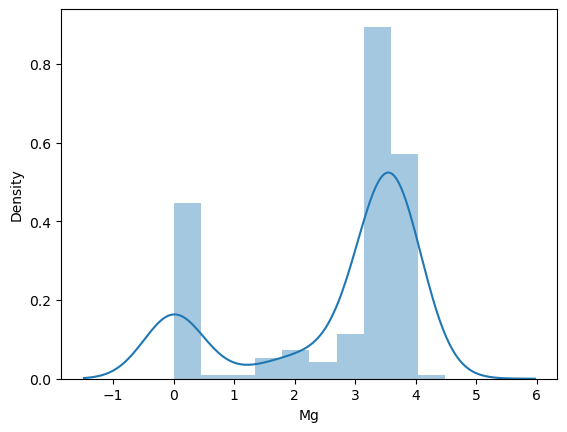

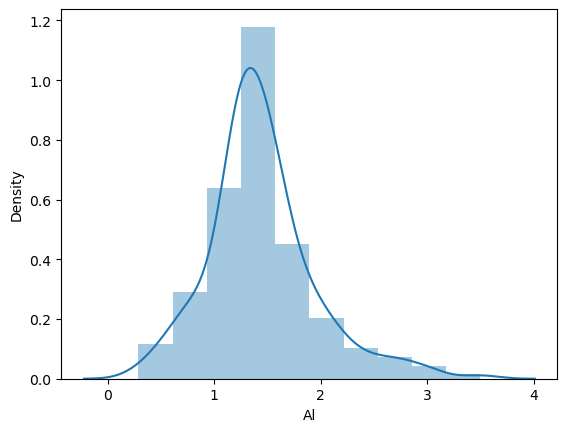

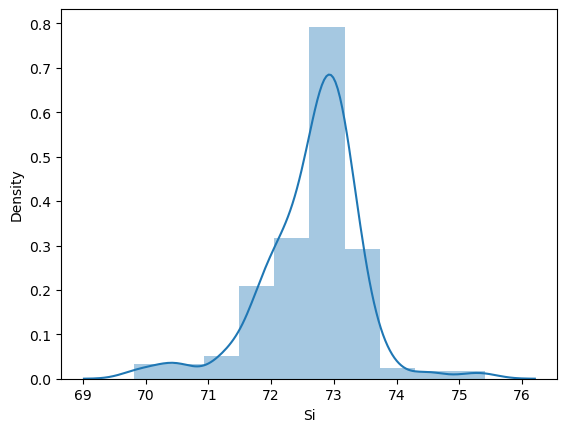

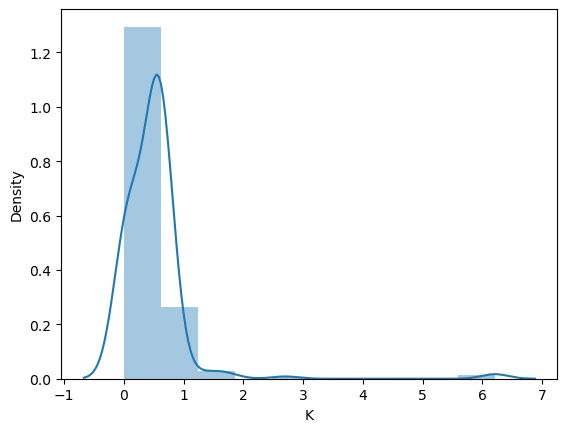

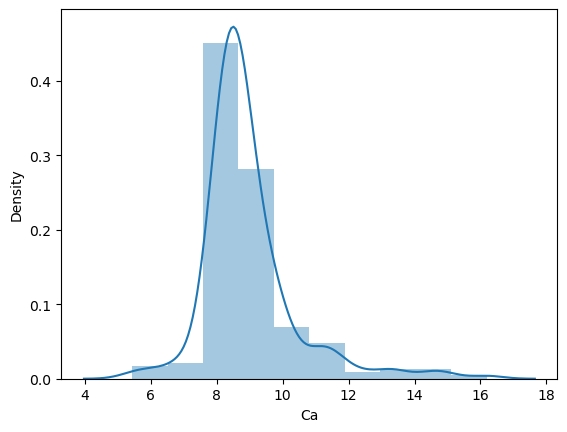

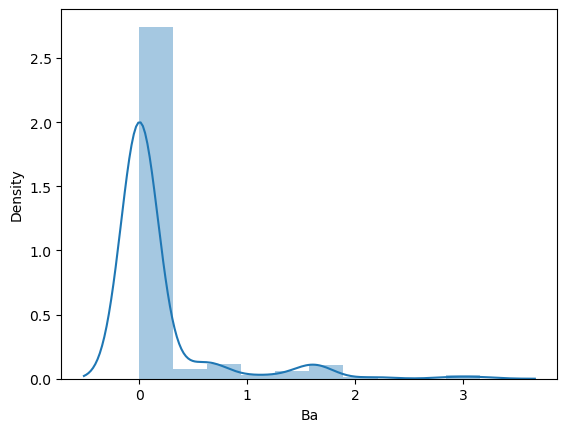

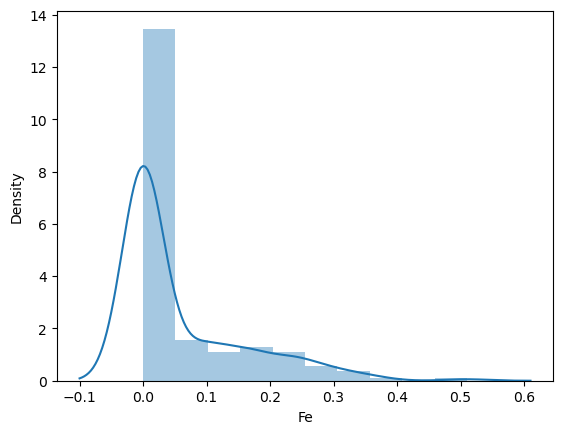

In [18]:
for i in input_data:
 
    sns.distplot(data[i],bins = 10)
    plt.xlabel(i)
  
    plt.show()
    

Here we can see that the data is skewed. so we need to handle that further.

In [19]:
# Bivariate analysis with bar plot
# checking the relation of the input features with target variable.

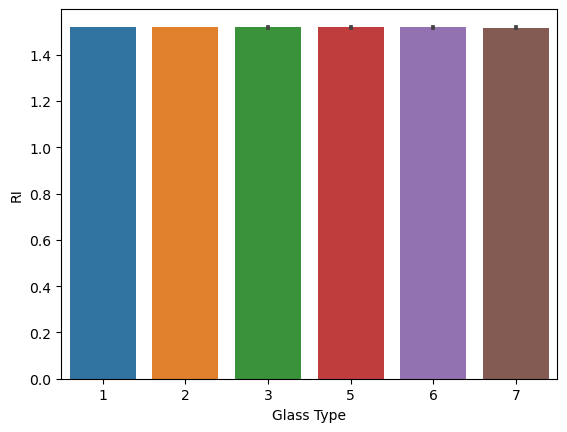

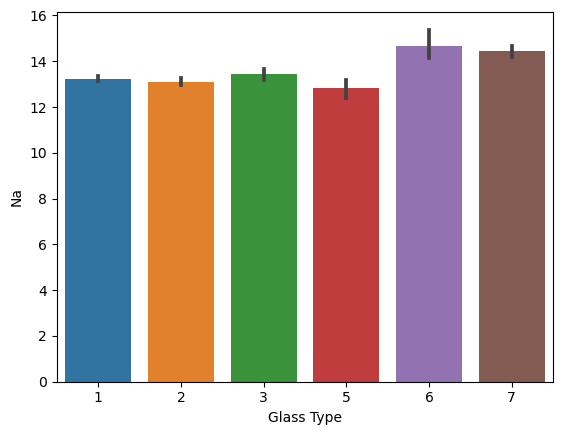

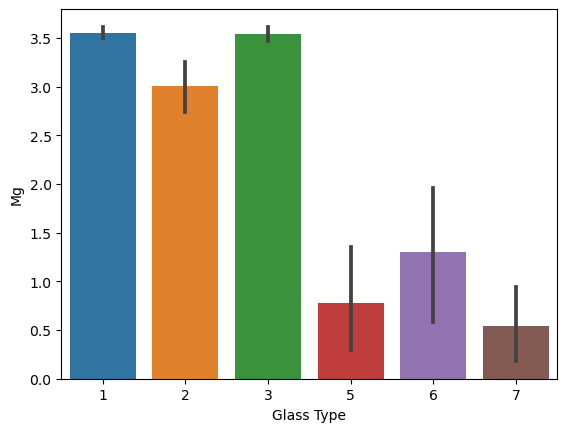

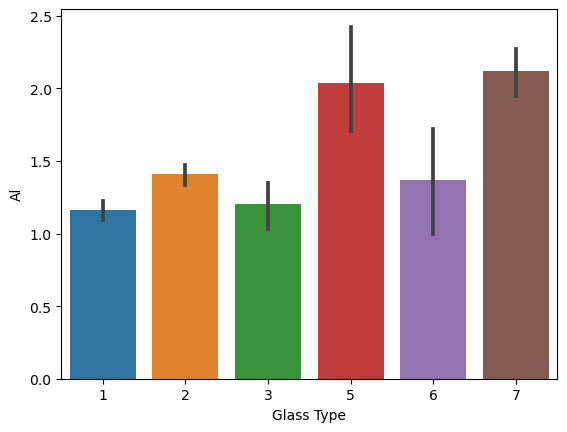

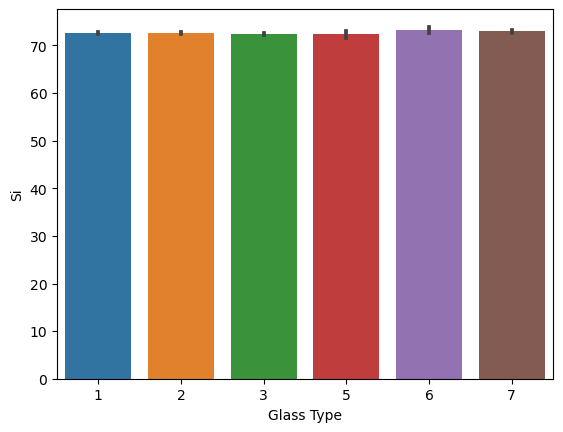

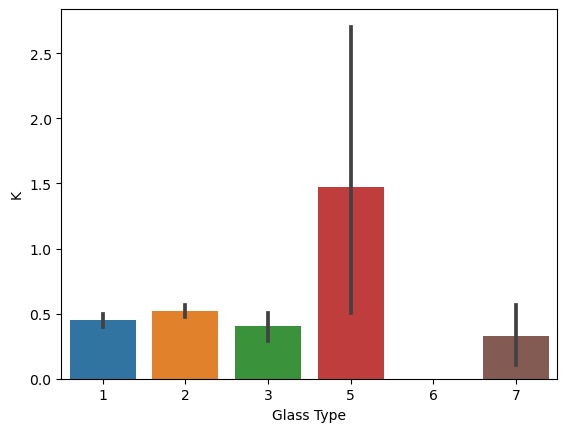

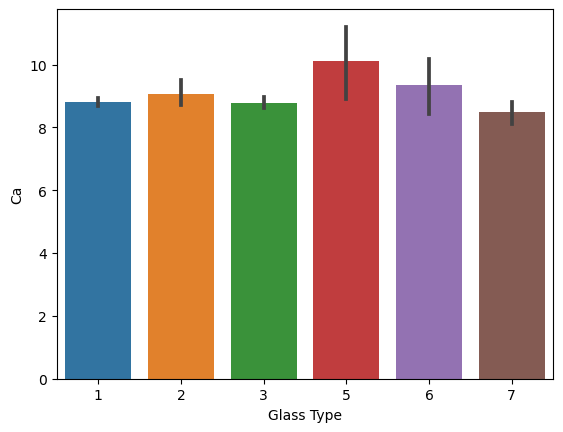

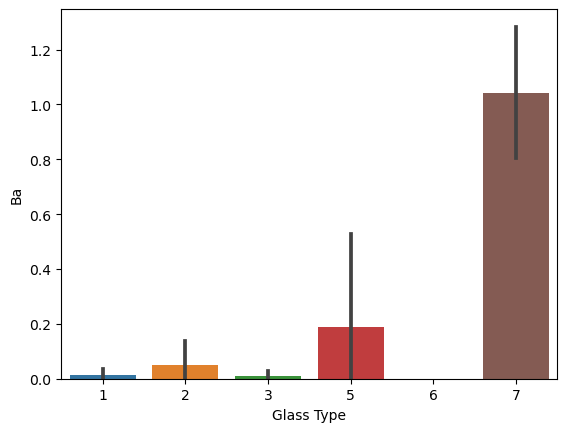

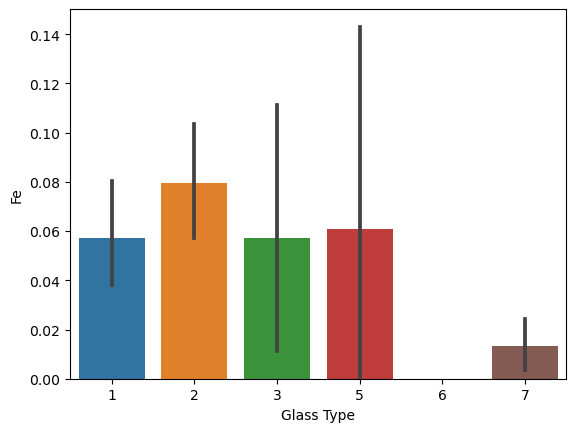

In [20]:
for i in input_data:
    sns.barplot(data['Type'],data[i])
    plt.ylabel(i)
    plt.xlabel("Glass Type")
    plt.show()

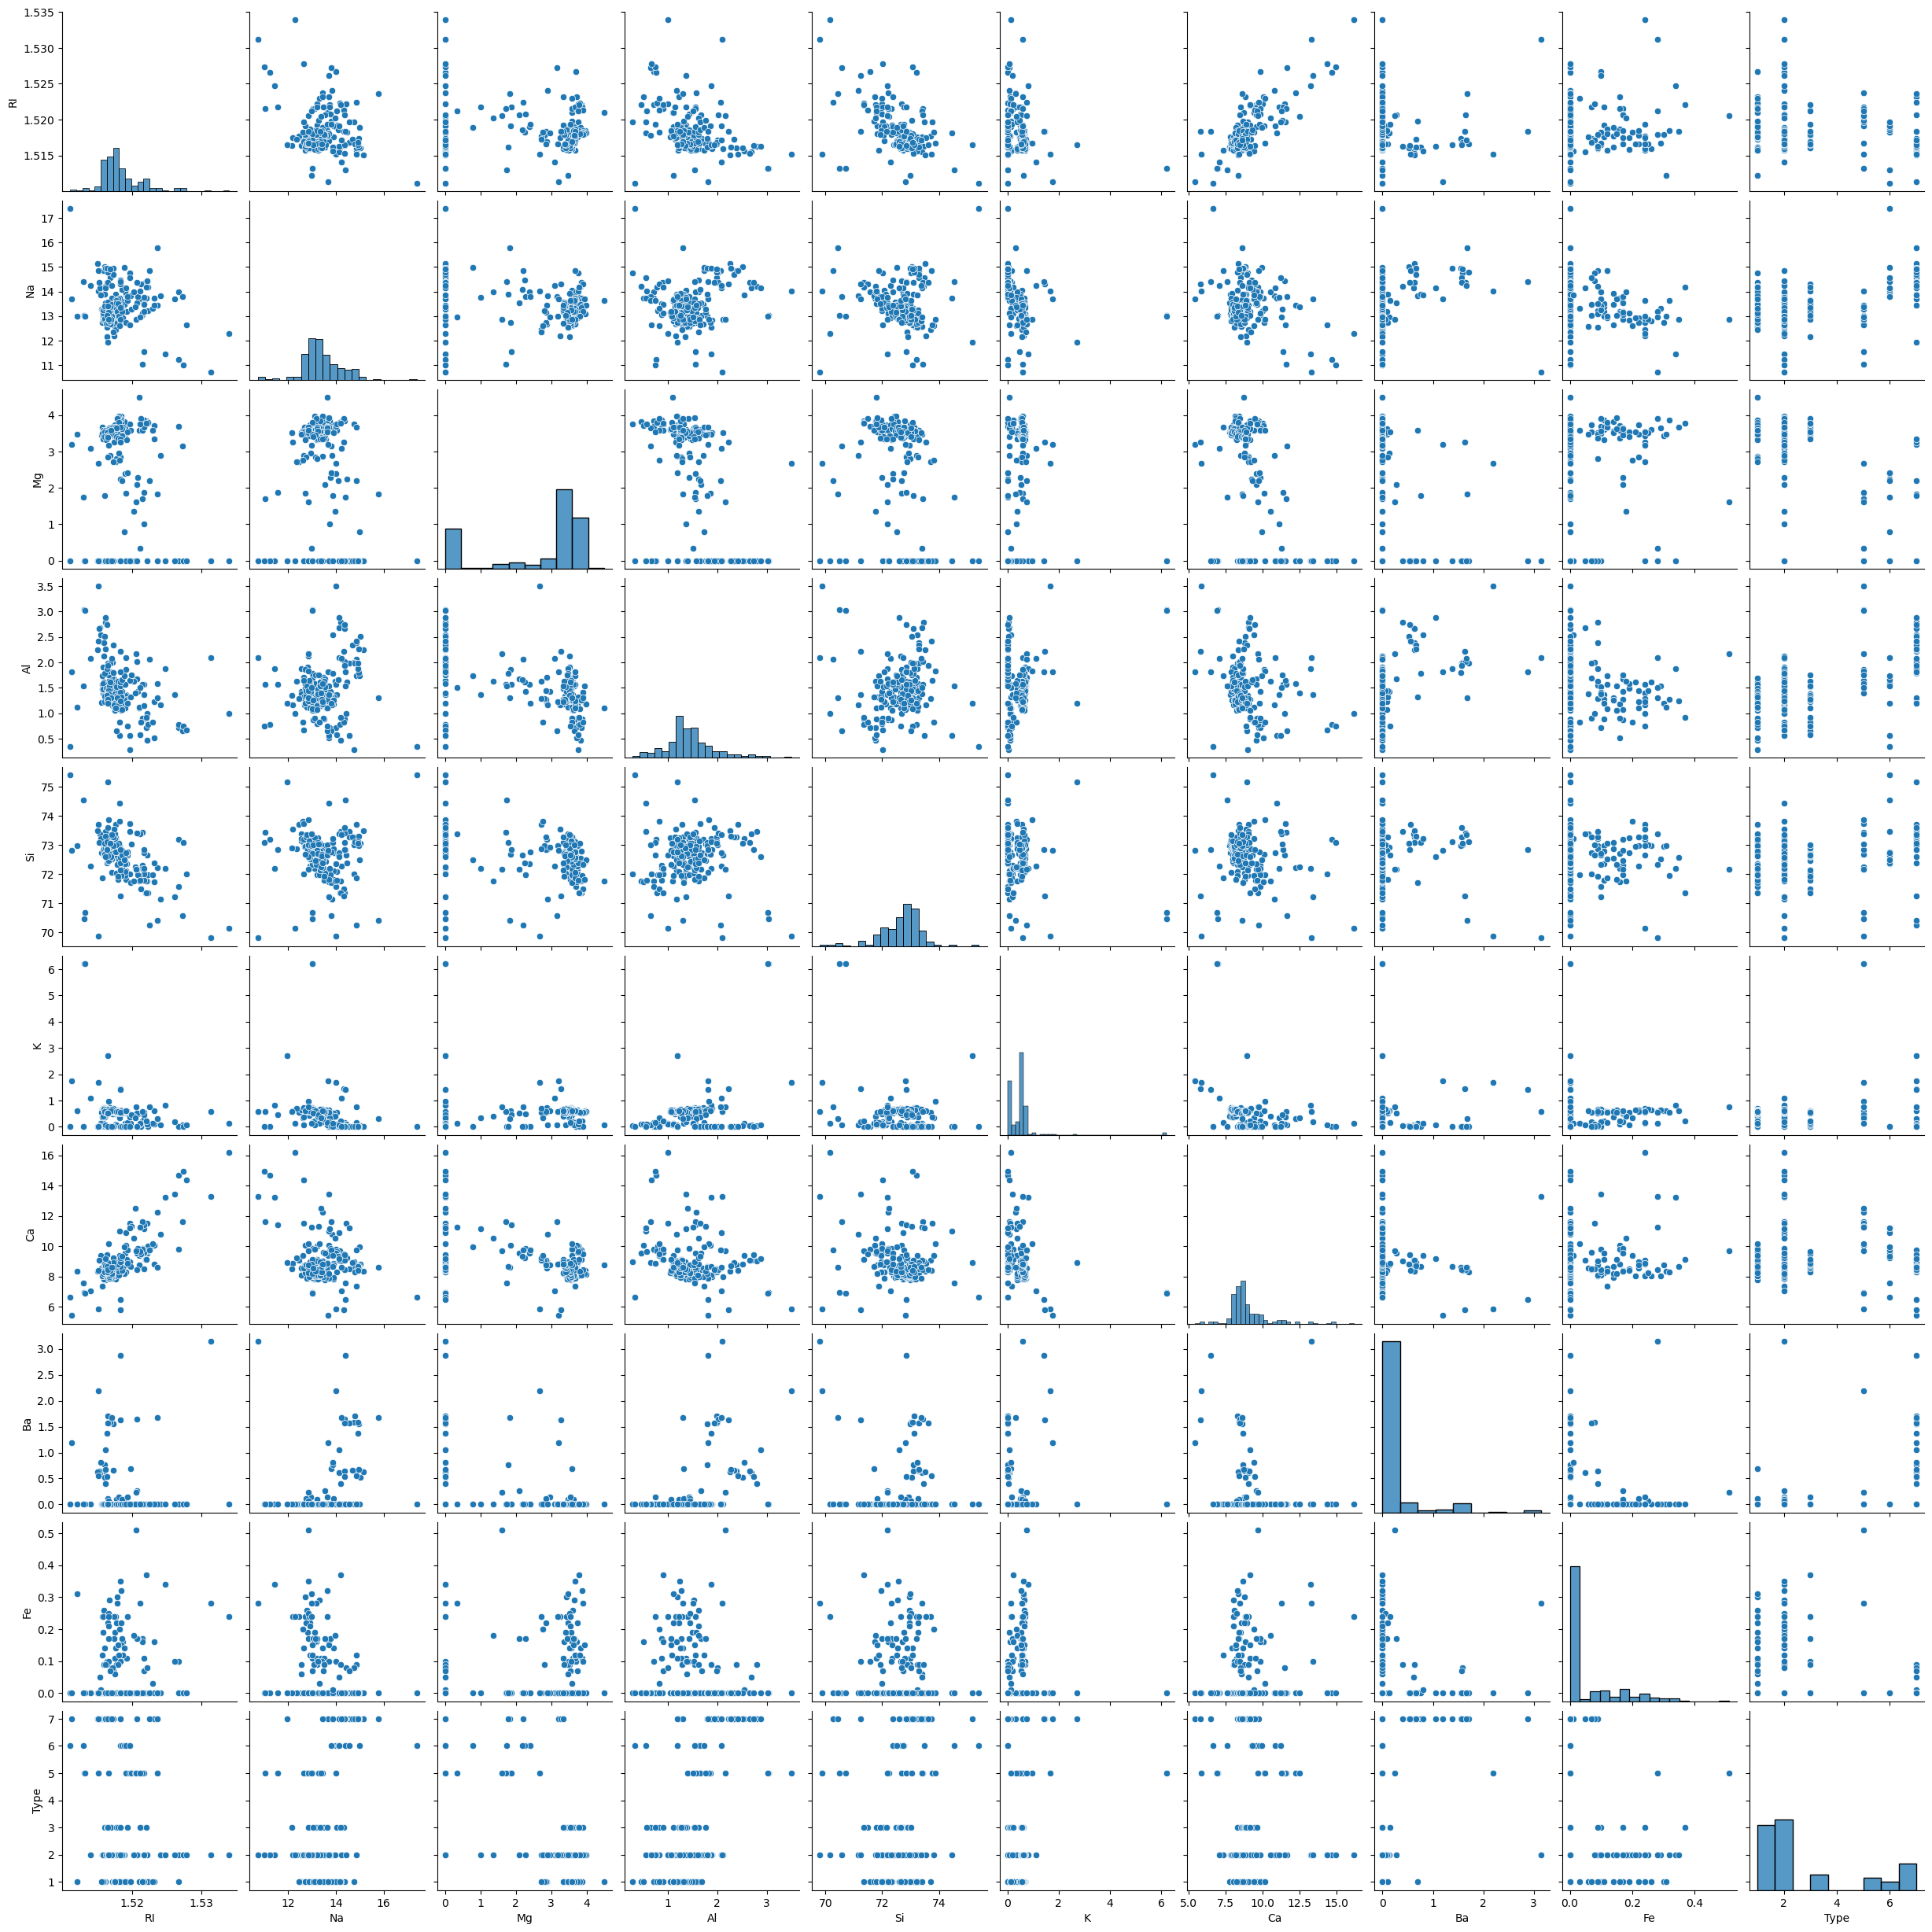

In [21]:
sns.pairplot(data)

*Form the aboveEDA we can see that the column "Ca" and "Ri" are positively correlated.

*Also we can see that the non_window glass has very less amaount of "K" ,"Mg" and "Fe".

*And for the window glass athe amount of Ba is very less.

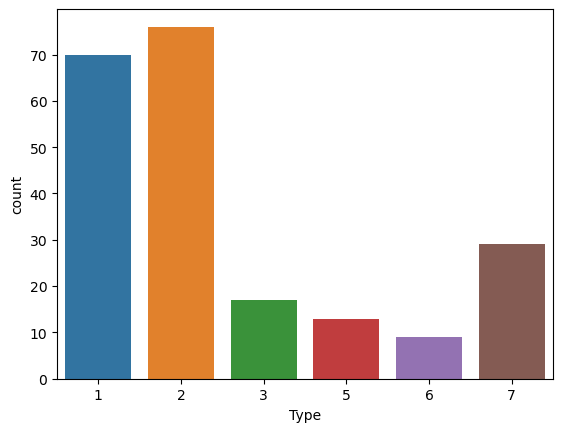

In [22]:
sns.countplot(data["Type"])
plt.show()

Here we can see that the data is imbalanced.

We have large data for window glass as compare to non-window glass


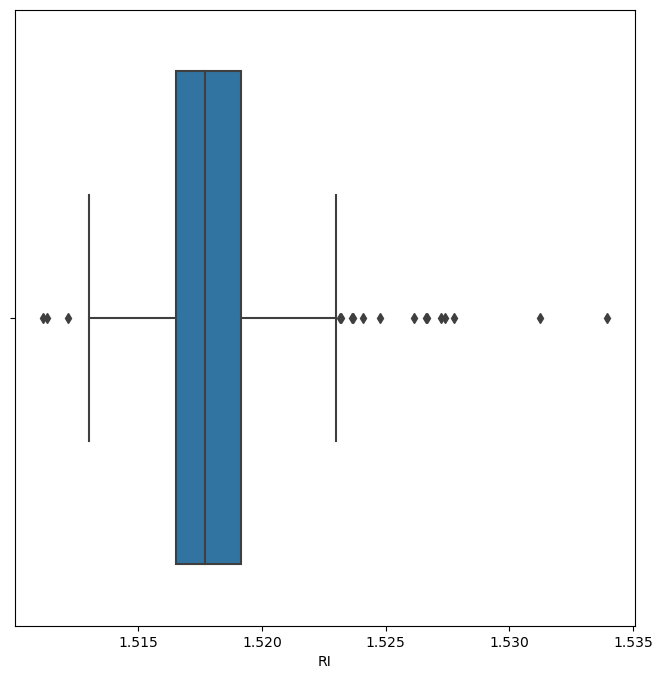

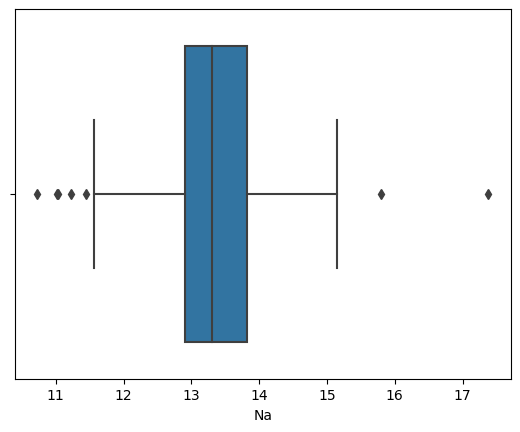

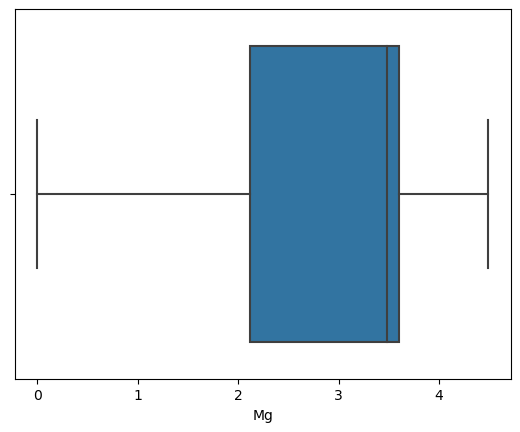

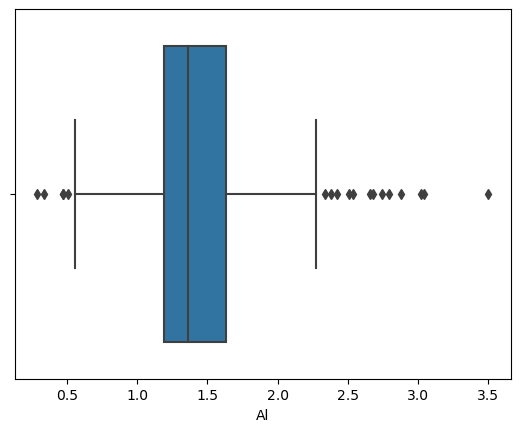

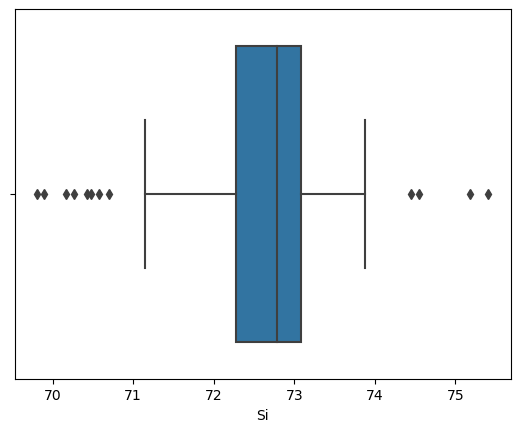

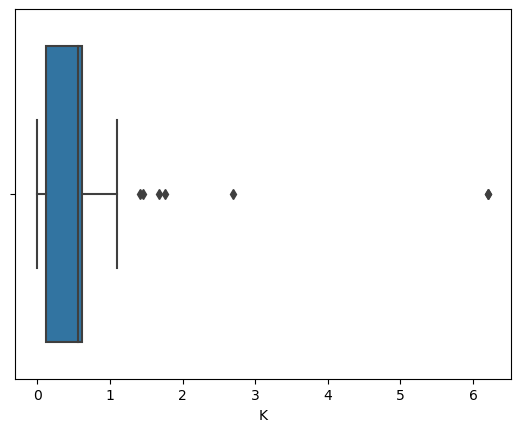

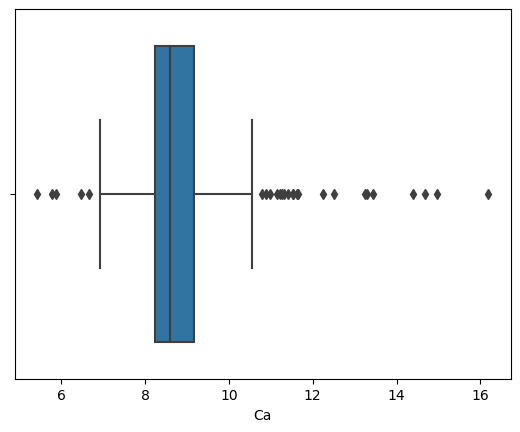

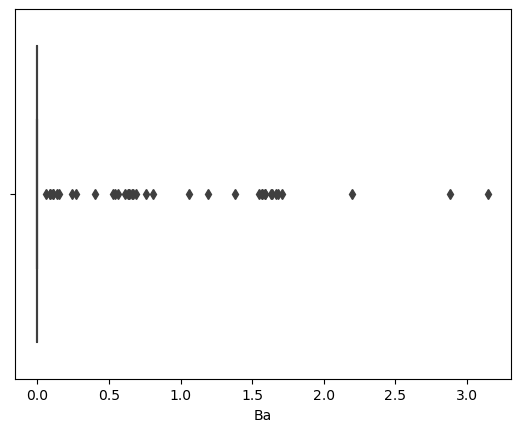

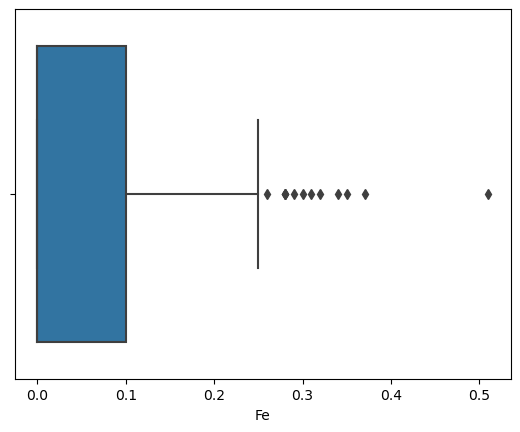

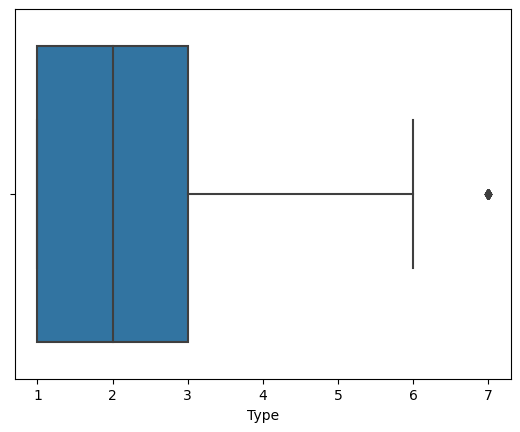

In [23]:
# Lets check the outliers
plt.figure(figsize = (8,8))

for i in data.columns:
    sns.boxplot(data[i])
    plt.show()

The Outliers are present in the dataset. we need to handle that with zscore

In [24]:
from scipy.stats import zscore

In [25]:
data1 = data.copy()
z = np.abs(zscore(data1))
z

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,0.872868,0.284953,1.254639,0.692442,1.127082,0.671705,0.145766,0.352877,0.586451,0.848275
1,0.249333,0.591817,0.636168,0.170460,0.102319,0.026213,0.793734,0.352877,0.586451,0.848275
2,0.721318,0.149933,0.601422,0.190912,0.438787,0.164533,0.828949,0.352877,0.586451,0.848275
3,0.232831,0.242853,0.698710,0.310994,0.052974,0.112107,0.519052,0.352877,0.586451,0.848275
4,0.312045,0.169205,0.650066,0.411375,0.555256,0.081369,0.624699,0.352877,0.586451,0.848275
...,...,...,...,...,...,...,...,...,...,...
209,0.704815,0.898681,1.865511,2.881125,0.052974,0.640968,0.157088,1.783978,0.586451,2.010478
210,0.500178,1.856097,1.865511,1.094342,0.529374,0.763919,0.392276,2.852405,0.586451,2.010478
211,0.754046,1.168721,1.865511,1.154570,0.995252,0.763919,0.364103,2.953200,0.586451,2.010478
212,0.612399,1.193270,1.865511,0.993960,1.241133,0.763919,0.335931,2.812087,0.586451,2.010478


In [26]:
# outliers
Threshold = 3
print(np.where(z>3))

(array([105, 106, 106, 106, 106, 106, 107, 107, 107, 110, 111, 112, 112,
       131, 145, 162, 163, 163, 163, 171, 171, 172, 172, 174, 184, 184,
       188, 189, 201, 201, 203, 207, 213], dtype=int64), array([6, 0, 1, 4, 6, 7, 0, 4, 6, 6, 6, 0, 6, 6, 8, 8, 3, 4, 7, 3, 5, 3,
       5, 8, 1, 4, 4, 7, 4, 5, 7, 7, 7], dtype=int64))


In [27]:
new_data = data1[(z<3).all(axis=1)]
new_data

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
208,1.51640,14.37,0.00,2.74,72.85,0.00,9.45,0.54,0.0,7
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7


In [28]:
# Data loss
loss = ((214-194)/214)*100
print("The loss data is :",loss,"%")

The loss data is : 9.345794392523365 %


In [29]:
#Let's Check the skewness
data4  = new_data.copy()
data4.skew()

RI      0.952733
Na      0.371482
Mg     -1.528849
Al      0.658259
Si     -0.425450
K       0.303175
Ca      1.077962
Ba      3.188587
Fe      1.486479
Type    1.284007
dtype: float64

Ba columns has the data skewed.

To remove the skewness we are using Square root tranformation.

In [30]:
from scipy.stats import boxcox

In [31]:
data4['Ba']=boxcox(data4['Ba'],.5)

In [32]:
# now lets Check the skewness
data4.skew()

RI      0.952733
Na      0.371482
Mg     -1.528849
Al      0.658259
Si     -0.425450
K       0.303175
Ca      1.077962
Ba      2.465013
Fe      1.486479
Type    1.284007
dtype: float64

<AxesSubplot:>

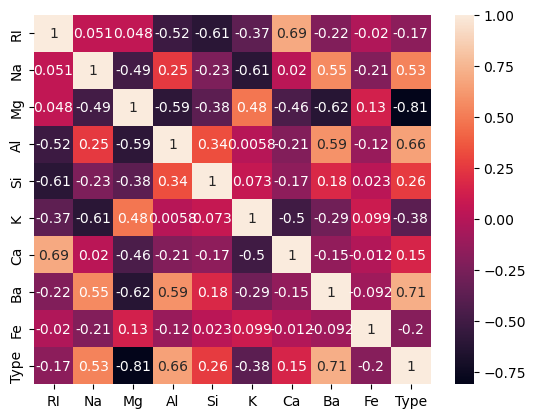

In [33]:
sns.heatmap(data4.corr(),annot =True)

In [127]:
# making the input data and the target variable seperate
data5 = data4.copy()

Since, The dataset can be divided into window glass (classes 1-4) and non-window glass (classes 5-7)
so we can make class 1- 4 as window glass data and class 5-7 as non-widow glass 

In [128]:
data5.dtypes

RI      float64
Na      float64
Mg      float64
Al      float64
Si      float64
K       float64
Ca      float64
Ba      float64
Fe      float64
Type      int64
dtype: object

In [130]:
data5['Type'].nunique()

6

In [133]:
# Let's convert the data into binary object as classes(1-4) are window and classes(5-7) non-window
for i in data5['Type']:
    if i>=5:
        data5['Type'].replace(i , "non_window", inplace =  True)
    elif i<4:
        data5['Type'].replace(i , "window", inplace =  True)
        


In [134]:
data5.shape

(194, 10)

In [135]:
data5

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,-2.000000,0.0,window
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,-2.000000,0.0,window
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,-2.000000,0.0,window
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,-2.000000,0.0,window
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,-2.000000,0.0,window
...,...,...,...,...,...,...,...,...,...,...
208,1.51640,14.37,0.00,2.74,72.85,0.00,9.45,-0.530306,0.0,non_window
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,0.059126,0.0,non_window
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,0.521904,0.0,non_window
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,0.561250,0.0,non_window


In [137]:
data5['Type'].unique()

array(['window', 'non_window'], dtype=object)

In [139]:
data5['Type'].value_counts()

window        154
non_window     40
Name: Type, dtype: int64

In [140]:
from imblearn.over_sampling import SMOTE

In [141]:
dx = data5.iloc[:,:-1]
dy = data5['Type']

In [142]:
dx.shape

(194, 9)

In [147]:
dy.shape

(194,)

In [149]:
smt = SMOTE()
datax,datay = smt.fit_resample(dx,dy )

In [150]:
datax.value_counts()

RI        Na         Mg        Al        Si         K     Ca         Ba         Fe  
1.522130  14.210000  3.820000  0.470000  71.770000  0.11  9.570000   -2.000000  0.00    2
1.511310  13.690000  3.200000  1.810000  72.810000  1.76  5.430000    0.181742  0.00    1
1.518470  13.100000  3.970000  1.190000  72.440000  0.60  8.430000   -2.000000  0.00    1
1.518440  13.250000  3.760000  1.320000  72.400000  0.58  8.420000   -2.000000  0.00    1
1.518416  14.256949  2.212561  1.641951  72.539148  0.00  9.292927   -2.000000  0.00    1
                                                                                       ..
1.516660  12.860000  0.000000  1.830000  73.880000  0.97  10.170000  -2.000000  0.00    1
1.516650  13.140000  3.450000  1.760000  72.480000  0.60  8.380000   -2.000000  0.17    1
1.516642  14.930378  0.000000  1.927734  73.085944  0.00  8.540099    0.432430  0.00    1
1.516630  12.930000  3.540000  1.620000  72.960000  0.64  8.030000   -2.000000  0.21    1
1.527250  13.80

In [151]:
datay.value_counts()

window        154
non_window    154
Name: Type, dtype: int64

<AxesSubplot:xlabel='Type', ylabel='count'>

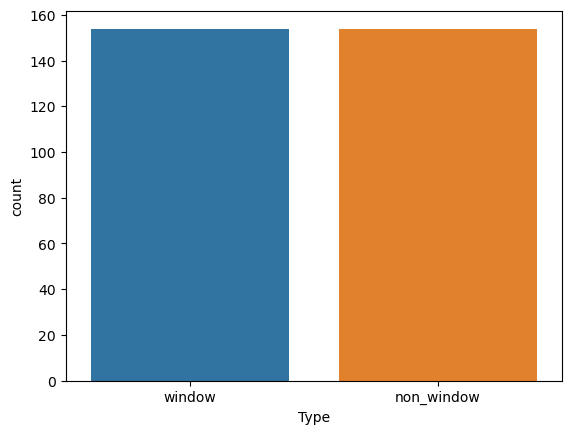

In [152]:
sns.countplot(datay)

Now our data is balanced.

In [153]:
from sklearn.preprocessing import LabelEncoder,StandardScaler


In [154]:
le = LabelEncoder()
datay = le.fit_transform(datay)

<AxesSubplot:ylabel='count'>

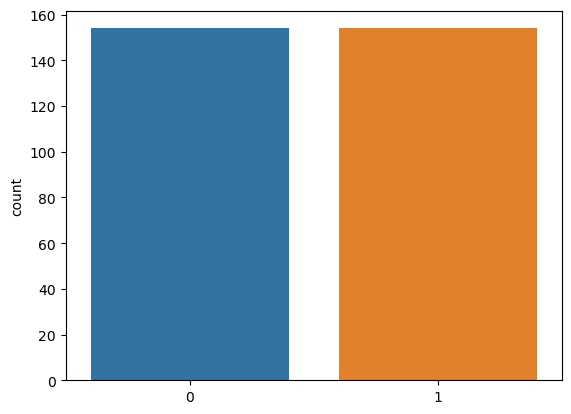

In [155]:
sns.countplot(datay)

In [156]:
datax1 = datax.copy()
st = StandardScaler()
st_data = st.fit_transform(datax1)

st_data

array([[ 1.43047943, -0.08802147,  1.5122    , ..., -0.25328951,
        -0.66532984, -0.52983737],
       [-0.12814292,  0.23825786,  0.96524594, ..., -1.14696223,
        -0.66532984, -0.52983737],
       [-0.78368115, -0.23158437,  0.93451818, ..., -1.1955314 ,
        -0.66532984, -0.52983737],
       ...,
       [-0.83371329,  1.64288983, -1.24715252, ..., -0.19417189,
         1.0030424 , -0.2047798 ],
       [-0.69859899,  0.28533705, -0.05800554, ..., -0.62393755,
         1.37452944, -0.52983737],
       [-0.61493282,  0.9567608 , -1.24715252, ..., -0.52427345,
         2.132536  , -0.52983737]])

In [158]:
st_data_Glass = pd.DataFrame(data=st_data)
st_data_Glass.to_csv("st_data_Glass.csv")

Now We have st_data is input variables and datay is our target variable

In [162]:
st_data_Glass['type'] = datay

In [163]:
st_data_Glass

,0,1,2,3,4,5,6,7,8,type
0,1.430479,-0.088021,1.512200,-1.019069,-1.927613,-0.833354,-0.253290,-0.665330,-0.529837,1
1,-0.128143,0.238258,0.965246,-0.537687,-0.204713,0.531957,-1.146962,-0.665330,-0.529837,1
2,-0.783681,-0.231584,0.934518,-0.204423,0.266817,0.239391,-1.195531,-0.665330,-0.529837,1
3,-0.105222,-0.649222,1.020556,-0.667290,-0.422343,0.824524,-0.768123,-0.665330,-0.529837,1
4,-0.215242,-0.570915,0.977537,-0.759863,0.430040,0.759509,-0.913830,-0.665330,-0.529837,1
...,...,...,...,...,...,...,...,...,...,...
303,-0.780083,0.615749,-1.247153,2.080791,1.092958,-0.877918,0.051023,0.783459,0.592456,0
304,-1.085986,0.338539,-1.247153,1.740010,0.806148,-0.643248,0.269370,1.247673,-0.208259,0
305,-0.833713,1.642890,-1.247153,1.525686,0.489690,-0.910305,-0.194172,1.003042,-0.204780,0
306,-0.698599,0.285337,-0.058006,0.341807,0.114994,-0.531432,-0.623938,1.374529,-0.529837,0


### MODEL BUILDING

In [164]:
from sklearn.model_selection import train_test_split

In [168]:
x_train,x_test,y_train,y_test = train_test_split(st_data,datay,random_state = 42 ,test_size = .20)

In [169]:
x_train.shape

(246, 9)

In [171]:
y_train.shape

(246,)

In [170]:
x_test.shape

(62, 9)

In [172]:
y_test.shape

(62,)

In [178]:
import statsmodels.api as sm 
from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor as vf

In [194]:
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report,roc_auc_score

In [197]:
models  = {
    "GaussianNB":GaussianNB(),
    "KNeighborsClassifier":KNeighborsClassifier(),
    "LogisticRegression":LogisticRegression(),
    "Random Forest":RandomForestClassifier(),
    "Decision Tree":DecisionTreeClassifier(),
    "SVC":SVC(),
}
for i in range(len(list(models))):
  #training the model
    model = list(models.values())[i]
    model.fit(x_train,y_train)
  #prediction   
    y_train_pred = model.predict(x_train)
    y_test_pred = model.predict(x_test)
    
  #training performance
    model_train_accuracy = accuracy_score(y_train,y_train_pred)
    model_train_roc_auc_score = roc_auc_score(y_train,y_train_pred)
    
  #testing performance
    model_test_accuracy = accuracy_score(y_test,y_test_pred)
    model_test_roc_auc_score = roc_auc_score(y_test,y_test_pred)
    
    
    
    print(list(models.keys())[i])
    
    print("* Model performace for training set")
    print("Accuracy Score :",model_train_accuracy)
    print("roc_auc_score : ",model_train_roc_auc_score)
  
    
    
    print("\n")
    print("* Model performace for testing set ")
    print("Accuracy Score :",model_test_accuracy)
    print("roc_auc_score : ",model_test_roc_auc_score)
    print("Confusion matrix \n",confusion_matrix(y_test,y_test_pred))
    print(confusion_matrix(y_test,y_test_pred))
    print('\n')
    print(classification_report(y_test,y_test_pred))
    
    print(" --------------------------------------------------- ")
    print("\n")

GaussianNB
* Model performace for training set
Accuracy Score : 0.943089430894309
roc_auc_score :  0.94295346377578


* Model performace for testing set 
Accuracy Score : 0.9193548387096774
roc_auc_score :  0.921875
Confusion matrix 
 [[27  5]
 [ 0 30]]
[[27  5]
 [ 0 30]]


              precision    recall  f1-score   support

           0       1.00      0.84      0.92        32
           1       0.86      1.00      0.92        30

    accuracy                           0.92        62
   macro avg       0.93      0.92      0.92        62
weighted avg       0.93      0.92      0.92        62

 --------------------------------------------------- 


KNeighborsClassifier
* Model performace for training set
Accuracy Score : 0.983739837398374
roc_auc_score :  0.9838709677419355


* Model performace for testing set 
Accuracy Score : 1.0
roc_auc_score :  1.0
Confusion matrix 
 [[32  0]
 [ 0 30]]
[[32  0]
 [ 0 30]]


              precision    recall  f1-score   support

           0       1

As we can see the the accuracy score KNeighborsClassifier is 1.0
This model is performing very good.

In [198]:
from sklearn.metrics import roc_curve

In [200]:
knc = KNeighborsClassifier()
knc.fit(x_train,y_train)
p = knc.predict(x_test )
print(accuracy_score(y_test,p))

1.0


In [201]:
#cross val score
from sklearn.model_selection import cross_val_score
score1 = cross_val_score(knc,st_data,datay,cv = 5)
print(score1.mean())
print(score1.std())

0.9674246430460073
0.02073786522230737


In [202]:
#Les's plot the auc roc curve
y_pred_prob = knc.predict_proba(x_test)[:,1]
y_pred_prob

array([0. , 1. , 1. , 0.6, 1. , 1. , 1. , 0. , 0. , 1. , 1. , 0. , 0. ,
       0. , 0. , 0. , 1. , 0. , 0. , 0. , 1. , 1. , 1. , 0. , 1. , 0.4,
       1. , 1. , 0.4, 0. , 1. , 1. , 1. , 0. , 1. , 1. , 1. , 1. , 0. ,
       1. , 1. , 1. , 0. , 0. , 0. , 0. , 0. , 1. , 0. , 1. , 1. , 0. ,
       1. , 1. , 0. , 0.2, 0. , 0. , 0. , 0. , 0. , 0. ])

In [203]:
fpr,tpr,threshold = roc_curve(y_test,y_pred_prob)

In [205]:
fpr

array([0.     , 0.     , 0.     , 0.0625 , 0.09375, 1.     ])

In [206]:
tpr

array([0.        , 0.96666667, 1.        , 1.        , 1.        ,
       1.        ])

In [207]:
threshold

array([inf, 1. , 0.6, 0.4, 0.2, 0. ])

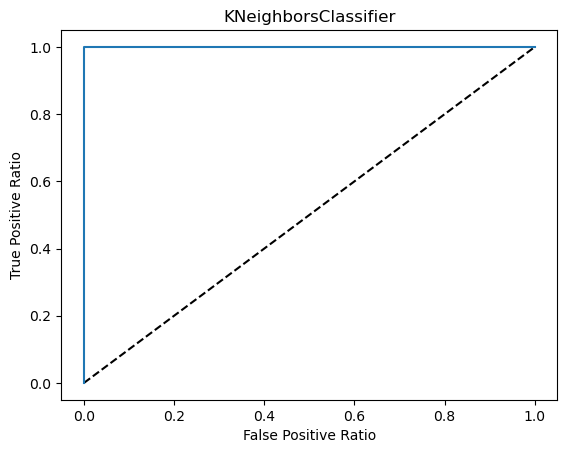

In [208]:
plt.plot([0,1],[0,1],"k--")
plt.plot(fpr,tpr,label = "KNeighborsClassifier")
plt.xlabel("False Positive Ratio")
plt.ylabel("True Positive Ratio")
plt.title("KNeighborsClassifier")
plt.show()

# Saving the best model

In [209]:
import joblib

In [210]:
joblib.dump(knc,"Glass_Prediction_knc.obj")

['Glass_Prediction_knc.obj']